In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [ ]:
dp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/b_depressed.csv")

In [ ]:
dp.head(5)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
dp["no_lasting_investmen"] = dp["no_lasting_investmen"].fillna(method='ffill')

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
dp = dp.drop(labels={'Survey_id','Ville_id'}, axis = 1)

<Axes: xlabel='depressed', ylabel='count'>

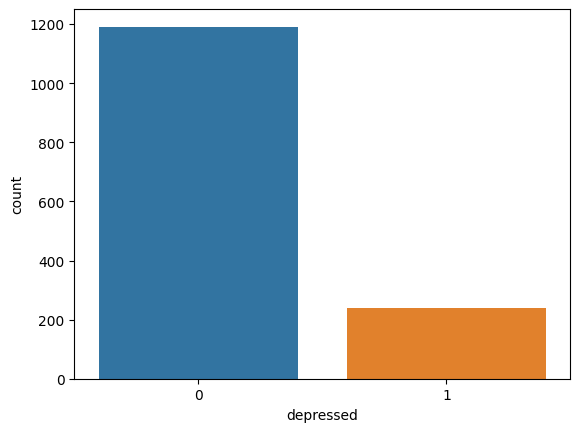

In [ ]:
sns.countplot(x = 'depressed', data = dp)

In [ ]:
#sns.pairplot(dp, hue = 'depressed')

<Axes: >

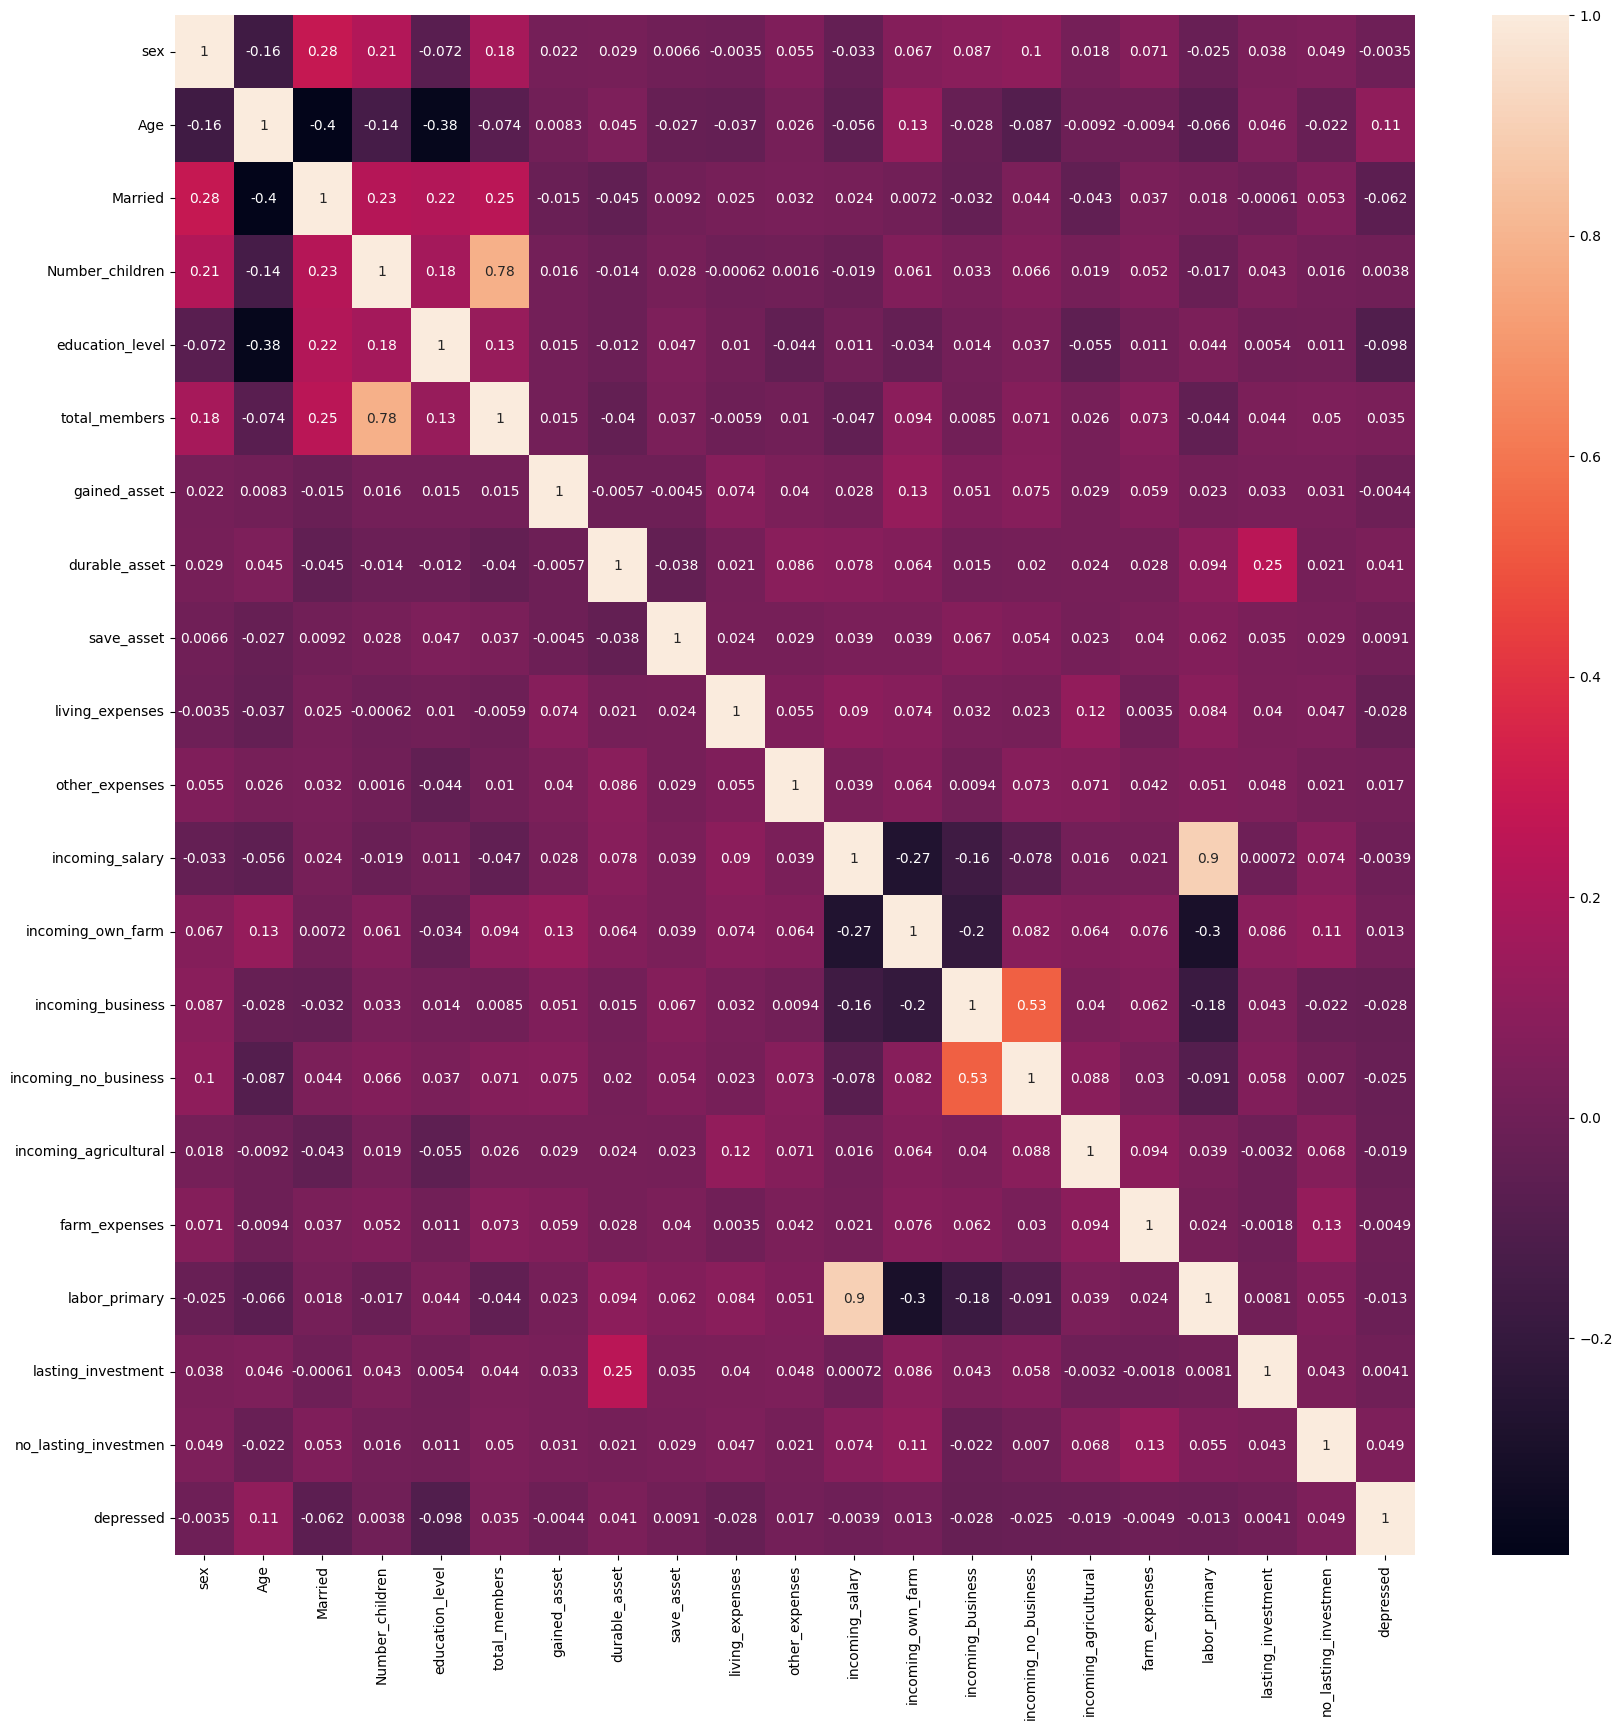

In [ ]:
fig = plt.subplots(figsize = (20,20))
sns.heatmap(dp.corr(), annot = True)

In [ ]:
selected_features = {'sex',	'Age',	'Married',	'Number_children',	'education_level', 'incoming_salary',	'incoming_own_farm',	'incoming_business',	'incoming_no_business', 'farm_expenses',	'labor_primary',	'lasting_investment',	'no_lasting_investmen' }
X = dp[selected_features]

<ipython-input-51-dd623e95835f>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = dp[selected_features]


In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1429 non-null   int64  
 1   Age                    1429 non-null   int64  
 2   Married                1429 non-null   int64  
 3   Number_children        1429 non-null   int64  
 4   education_level        1429 non-null   int64  
 5   total_members          1429 non-null   int64  
 6   gained_asset           1429 non-null   int64  
 7   durable_asset          1429 non-null   int64  
 8   save_asset             1429 non-null   int64  
 9   living_expenses        1429 non-null   int64  
 10  other_expenses         1429 non-null   int64  
 11  incoming_salary        1429 non-null   int64  
 12  incoming_own_farm      1429 non-null   int64  
 13  incoming_business      1429 non-null   int64  
 14  incoming_no_business   1429 non-null   int64  
 15  inco

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lasting_investment    1429 non-null   int64  
 1   incoming_no_business  1429 non-null   int64  
 2   Number_children       1429 non-null   int64  
 3   farm_expenses         1429 non-null   int64  
 4   education_level       1429 non-null   int64  
 5   incoming_salary       1429 non-null   int64  
 6   incoming_business     1429 non-null   int64  
 7   Married               1429 non-null   int64  
 8   sex                   1429 non-null   int64  
 9   no_lasting_investmen  1429 non-null   float64
 10  Age                   1429 non-null   int64  
 11  incoming_own_farm     1429 non-null   int64  
 12  labor_primary         1429 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 145.3 KB


In [ ]:
y = dp['depressed']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.28516402, 0.        , 0.36363636, ..., 0.14864865, 0.        ,
        0.        ],
       [0.28516402, 0.        , 0.27272727, ..., 0.08108108, 0.        ,
        0.        ],
       [0.28516402, 0.        , 0.27272727, ..., 0.06756757, 0.        ,
        0.        ],
       ...,
       [0.4666315 , 0.        , 0.        , ..., 0.66216216, 1.        ,
        0.        ],
       [0.28516402, 0.        , 0.09090909, ..., 0.45945946, 0.        ,
        0.        ],
       [0.70007217, 1.        , 0.36363636, ..., 0.21621622, 1.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)

In [ ]:
X_train.shape

(1143, 13)

In [ ]:
X_test.shape

(286, 13)

In [ ]:
y_train.shape

(1143,)

In [ ]:
y_test.shape

(286,)

In [ ]:
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (13, )))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
epochs_hist = classifier_model.fit(X_train, y_train, epochs = 500, batch_size = 512)

Epoch 1/500
3/3 [==============================] - 2s 10ms/step - loss: 0.6193 - accuracy: 0.7104
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4680 - accuracy: 0.8329
Epoch 3/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4759 - accuracy: 0.8329
Epoch 4/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4851 - accuracy: 0.8329
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4705 - accuracy: 0.8329
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4507 - accuracy: 0.8329
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4514 - accuracy: 0.8329
Epoch 8/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4575 - accuracy: 0.8329
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4547 - accuracy: 0.8329
Epoch 10/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4498 - accuracy: 0.8329
Epoch 11/500
3/3 [==========

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

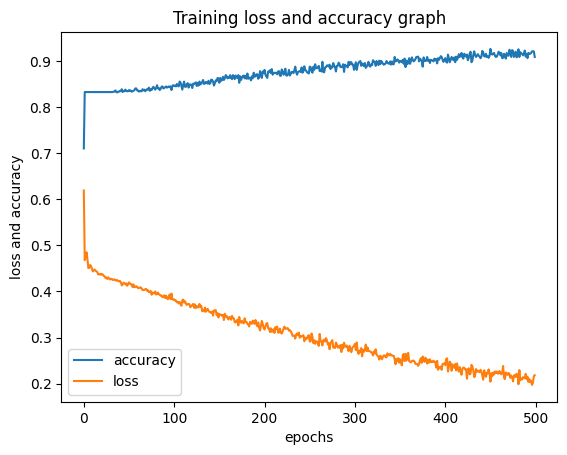

In [ ]:
eh = epochs_hist.history['loss']
eh2 = epochs_hist.history['accuracy']
plt.plot(eh2)
plt.plot(eh)
plt.title('Training loss and accuracy graph')
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')
plt.legend({'accuracy', 'loss'})

In [ ]:
y_predict = classifier_model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
y_predict

array([[8.19259286e-01],
       [2.37419009e-02],
       [2.00168785e-07],
       [6.67840801e-03],
       [4.63627541e-04],
       [2.28919918e-04],
       [9.96984635e-03],
       [4.89141159e-02],
       [1.35567367e-01],
       [4.77005541e-02],
       [8.55722930e-04],
       [1.67886481e-01],
       [2.86255758e-02],
       [6.72652498e-02],
       [9.15195514e-03],
       [1.21981144e-01],
       [7.76796043e-03],
       [3.86683494e-02],
       [1.77333618e-06],
       [7.62421712e-02],
       [5.72963730e-02],
       [2.59189725e-01],
       [3.40896063e-02],
       [1.05177522e-01],
       [5.13294945e-03],
       [4.83814022e-03],
       [3.44302748e-06],
       [7.68308353e-04],
       [9.62440099e-05],
       [1.85251512e-04],
       [1.09915542e-04],
       [1.28963729e-05],
       [3.96021642e-05],
       [5.90463765e-02],
       [2.60440902e-05],
       [1.71157368e-03],
       [1.95604656e-03],
       [9.07192156e-02],
       [8.16419244e-01],
       [1.02057241e-01],


In [ ]:
evaluation = classifier_model.evaluate(X_test, y_test)
print('test accuracy:{}'.format(evaluation[1]))

9/9 [==============================] - 0s 4ms/step - loss: 0.9184 - accuracy: 0.8042
test accuracy:0.8041958212852478


In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [ ]:
model1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model1.score(X_test,y_test)

0.8356643356643356

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
model2.score(X_test, y_test)

0.8321678321678322

In [ ]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()

In [ ]:
model3.fit(X_test, y_test)
model3.score(X_test, y_test)

0.8356643356643356

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model4.score(X_test, y_test)

0.8216783216783217